<h3> Importing Necessary Packages </h3>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h3> Loading in the Data </h3>

Loading the movies and credits data set from: The Movie Database (tmbd)

In [3]:
movies = pd.read_csv("./tmbd_dataset/tmdb_5000_movies.csv")
credits = pd.read_csv("./tmbd_dataset/tmdb_5000_credits.csv")

In [4]:
# Shape of the movies dataframe
print("Shape of movies dataframe is:", movies.shape)


# Shape of the credits dataframe
print("Shape of credits dataframe is:", credits.shape)


Shape of movies dataframe is: (4803, 20)
Shape of credits dataframe is: (4803, 4)


In [5]:
print("Shape of Credits Dataframe is:", credits.shape)
credits.head(3)

Shape of Credits Dataframe is: (4803, 4)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


<h3>2. Data Scrubbing (Cleaning the Data) </h3>

<h4> Checking for Missing Values </h4>

In [6]:
# Checking for missing values
movies.dropna(inplace=True)
movies.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

<h4> Merging the data (movies + credits)</h4>

In [7]:
movies_df = pd.merge(movies, credits, on='title')
movies_df = movies_df[['movie_id','title','overview','genres', 'keywords','cast','crew','popularity','vote_average','vote_count']]
movies_df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,popularity,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",139.082615,6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",107.376788,6.3,4466


<h4> Creating a Function to Proccess the Text </h4>

In [8]:
# import abstract syntax trees module to help process syntax 
import ast

In [9]:
# Function to get the important texts 
def convert_text(texts):
    lists = []
    
    for i in ast.literal_eval(texts):
        lists.append(i['name'])
        
    return lists
# Function to get only the director from the crews column
def find_director_and_producer(crew):
    lists = []
    
    for i in ast.literal_eval(crew):
        if i['job'] == 'Director':
            lists.append(i['name'])
        if i['job'] == 'Executive Producer':
            lists.append(i['name'])
    return lists

    # Function to collapse the spaces in the column strings
def collapse(text):
    L2 = []
    for i in text:
        L2.append(i.replace(" ",""))
    return L2


<h4> Applying our Function to Preprocess the text and clean the data </h4>

In [10]:
# Apply the function to clean up and make the dataframe columns more readable
movies_df['genres'] = movies_df['genres'].apply(convert_text)
movies_df['keywords'] = movies_df['keywords'].apply(convert_text)
movies_df['cast'] = movies_df['cast'].apply(convert_text)

# Apply the function to get only the director and executive producer for the crew column
movies_df['crew'] = movies_df['crew'].apply(find_director_and_producer)

# Show only the top 3 cast members 
movies_df['cast'] = movies_df['cast'].apply(lambda x:x[0:3])

In [11]:
# collapse the spaces for the columns
movies_df['cast'] = movies_df['cast'].apply(collapse)
movies_df['crew'] = movies_df['crew'].apply(collapse)
movies_df['genres'] = movies_df['genres'].apply(collapse)
movies_df['keywords'] = movies_df['keywords'].apply(collapse)

# split the overview column to isolate the words
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())

In [12]:
# Create a new column, 'Tags', where we add all the wordings are grouped together
movies_df['Tags'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'] + movies_df['crew']

# Drop the unneccesary columns
new_movies_df = movies_df.drop(columns=['overview','genres','keywords','cast','crew', 'popularity','vote_average', 'vote_count'])

# Join the Tags by spaces
new_movies_df['Tags'] = new_movies_df['Tags'].apply(lambda x: " ".join(x))

In [13]:
# Preview sample of our new dataframe
new_movies_df.sample(3)

,movie_id,title,Tags
271,310,Bruce Almighty,"Bruce Nolan toils as a ""human interest"" televi..."
146,22,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira..."
1201,47088,The Extra Man,THE EXTRA MAN is a sophisticated and moving co...


<h3> 2. Exploratory Data Analysis (EDA) <h3>

In [14]:
# import altair vizualization module
import altair as alt

In [15]:
# Generate a list of genres and count them to find the popular genres
L = []
for i in movies_df['genres']:
    L.extend(i)
    
genre_counts = pd.Series(L).value_counts().sort_values(ascending = False).reset_index()
genre_counts = pd.DataFrame(genre_counts)[0:10]
genre_counts = genre_counts.rename(columns={"index": "Genres", 0: "Count"})

genre_counts

,Genres,Count
0,Drama,629
1,Comedy,500
2,Thriller,419
3,Action,417
4,Adventure,323
5,Romance,233
6,ScienceFiction,214
7,Crime,207
8,Family,201
9,Fantasy,175


In [16]:
popular_titles = movies_df[movies_df['popularity'] > 100][['title', 'popularity']].sort_values(by = 'popularity',ascending=False).reset_index()
popular_titles = popular_titles.rename(columns={"title": "Title", "popularity": "Popularity"})[0:15]

popular_titles['Popularity'] = popular_titles['Popularity'].round()

popular_titles

,index,Title,Popularity
0,314,Minions,876.0
1,76,Interstellar,724.0
2,428,Deadpool,515.0
3,75,Guardians of the Galaxy,481.0
4,101,Mad Max: Fury Road,434.0
5,24,Jurassic World,419.0
6,146,Pirates of the Caribbean: The Curse of the Bla...,272.0
7,67,Dawn of the Planet of the Apes,244.0
8,147,The Hunger Games: Mockingjay - Part 1,206.0
9,71,Big Hero 6,204.0


In [17]:
bar = alt.Chart(popular_titles).mark_bar().encode(
        x = alt.X('Popularity:Q'),
        y = alt.Y('Title:N', sort = '-x')
).properties(
    title='Top 15 Movies Based On Popularity Ratings',
    width = 500,
    height = 250
)


text = alt.Chart(popular_titles).mark_text(
    dx = -14, dy =1,
    color = 'black',
    fontStyle = 'bold'
).encode(
    x = alt.X('Popularity:Q', stack='zero'),
    y = alt.Y('Title:N', sort = '-x'),
    text =alt.Text('Popularity:Q')
)

display(bar+text)

alt.LayerChart(...)

In [18]:
# Plot a horizontal bar chart of top genres and their count
bars = alt.Chart(genre_counts).mark_bar().encode(
    y= alt.Y('Genres:N', sort = '-x'),
    x=alt.X('Count:Q'),
    color = alt.Color('Count', scale=alt.Scale(scheme='greens'))
).properties(
    title='Top Genres for Tmbd Movie Dataset',
    width = 500,
    height = 250
)

text = alt.Chart(genre_counts).mark_text(
                                dx=-14, dy=1, 
                                color='black', 
                                fontStyle='bold',
                                fontSize=14).encode(
    y=alt.Y('Genres:N', sort = '-x'),
    x=alt.X('Count:Q', title = 'Total Count', stack='zero'),
    text=alt.Text('Count:Q')
)

(bars + text).configure(background='grey')

alt.LayerChart(...)

In [19]:
# import wordcloud module
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [20]:
movies_df['title'] = movies_df['title'].fillna("").astype('str')
titles_collection = ' '.join(movies_df['title'])
titles_wordcloud = WordCloud(stopwords=STOPWORDS, background_color= 'grey', width = 5000, height = 2000).generate(titles_collection)

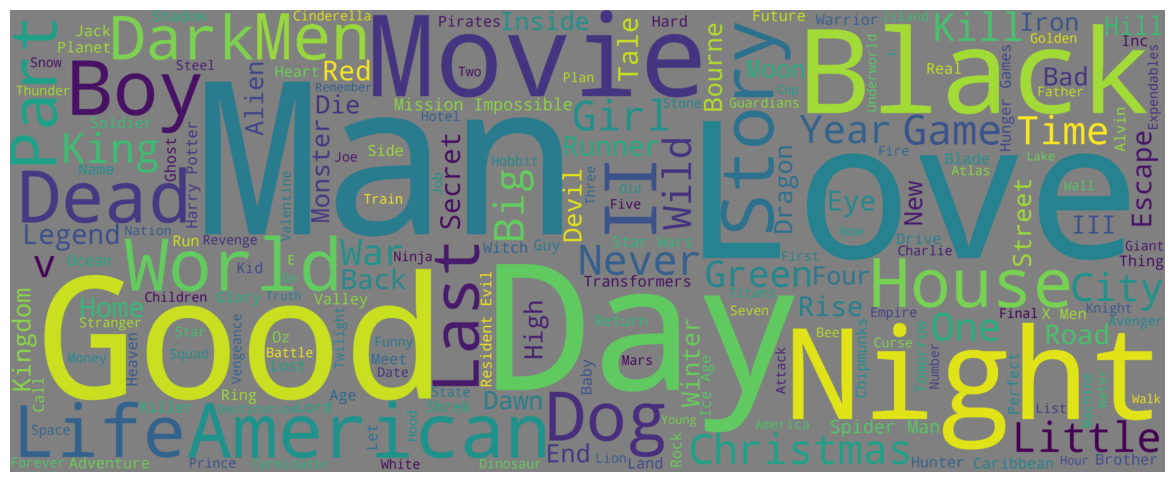

In [21]:
# Plot the wordcloud of popular title words
plt.figure(figsize=(22,6))
plt.imshow(titles_wordcloud, interpolation = 'bilinear')
plt.axis('off');

<h2> Content Based Filtering with Keywords and Movie Tags as Predictor </h2>

<h3> Finding the Cosine Similarities using CountVectorizer

In [22]:
# import CountVectorizer Module
from sklearn.feature_extraction.text import CountVectorizer

# Create vector matrix
cv = CountVectorizer(max_features=10000,stop_words='english')
vector = cv.fit_transform(new_movies_df['Tags']).toarray()

# Check vector shape
vector.shape

(1494, 10000)

In [23]:
# import cosine similarity module
from sklearn.metrics.pairwise import cosine_similarity

# Compute the similarities
similarity = cosine_similarity(vector)

<h3> Create Recommendation Function Based Off Cosine Similarity for Movie Tags </h3

In [24]:
from tabulate import tabulate

# Create function to find recommended movies based off cosine similarity
def recommend_movie(movie):
    rec_list = []
    
    index = new_movies_df[new_movies_df['title'] == movie].index[0]
    similarity_score = list(enumerate(similarity[index]))
    similarity_score = sorted(similarity_score, reverse=True,key = lambda x: x[1])
    
    for i in similarity_score[1:6]: 
        rec_list.append(new_movies_df.iloc[i[0]].title)
    
    recmnd_df = pd.DataFrame(rec_list)
    recmnd_df.index = recmnd_df.index + 1
    
    rank_recommendation_table = tabulate(recmnd_df, headers = (['Rank', 'Recommended Title']), tablefmt = 'psql')
    
    print('Recommend:',new_movies_df.loc[index].title)
    print(rank_recommendation_table, '\n')

<h3> Testing Content-Based Filtering Reccomendation System of a Random Smaple of 5 Titles </h3>

In [25]:
# import random module and random sample
import random as rand
from random import sample

mov_list = []

mov_list = new_movies_df['title'].tolist()
mov_list = sample(mov_list,4)

for i in mov_list:
    recommend_movie(i)
    
# testing on the popular minions movie 
recommend_movie('Minions')

Recommend: Dawn of the Planet of the Apes
+--------+---------------------------------------+
|   Rank | Recommended Title                     |
|--------+---------------------------------------|
|      1 | Rise of the Planet of the Apes        |
|      2 | The Maze Runner                       |
|      3 | Terminator Salvation                  |
|      4 | Mad Max: Fury Road                    |
|      5 | The Hunger Games: Mockingjay - Part 1 |
+--------+---------------------------------------+ 

Recommend: Fast Five
+--------+---------------------------------------+
|   Rank | Recommended Title                     |
|--------+---------------------------------------|
|      1 | Furious 7                             |
|      2 | The Fast and the Furious: Tokyo Drift |
|      3 | Now You See Me 2                      |
|      4 | Triple 9                              |
|      5 | Harsh Times                           |
+--------+---------------------------------------+ 

Recommend: Cora

In [26]:
# Top Movie titles with a 8.0 or higher rating
movies_df[movies_df['vote_average'] >= 8.0].title[0:15]

54                                       The Dark Knight
63                                            Inside Out
76                                          Interstellar
77                                             Inception
189    The Lord of the Rings: The Fellowship of the Ring
222        The Lord of the Rings: The Return of the King
223                The Lord of the Rings: The Two Towers
295                                        The Lion King
369                                           Fight Club
386                                       The Green Mile
573                                         The Prestige
645                                          The Pianist
679                                       Apocalypse Now
685                                                Se7en
776                                     Schindler's List
Name: title, dtype: object

<h2> Content Based Filtering using Genres as the Predictor </h2>

<h3>Finding the Cosine Similarity with TfidVectorizaer

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert genres to string value to utilize TfidVectorizer
movies_df['genres'] = movies_df['genres'].astype('str')

tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['genres'].values.astype('U'))
tfidf_matrix.shape

(1494, 653)

In [28]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
# Build a 1-dimensional array with movie titles
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=titles)

<h3>  Create Movie Recommendation Function Based on Genres Similarity </h3>

In [30]:
# function for recommending titles based off genres
def genre_recommendations(movie):
    rec_list = []
    
    index = indices[movie]
    
    similarity_score = list(enumerate(cosine_sim[index]))
    similarity_score = sorted(similarity_score, reverse=True, key = lambda x: x[1])
    
    for i in similarity_score[1:7]:
        rec_list.append(titles.iloc[i[0]])
        
    rec_list = rec_list[1:6]
    
        
    recmnd_df = pd.DataFrame(rec_list)
    recmnd_df.index = recmnd_df.index + 1
    
    rank_recommendation_table = tabulate(recmnd_df, headers = (['Rank', 'Recommended Title']), tablefmt = 'psql')
    
    print('Recommend:',movies_df.loc[index].title)
    print(rank_recommendation_table, '\n')
    #movie_indices = [i[0] for i in similarity_score]
    #return titles.iloc[movie_indices]

<h3> Testing the Movie Recommendation System Based Off Genres as the Main Factor </h3>

In [31]:
mov_list = []

mov_list = movies_df['title'].tolist()
mov_list = sample(mov_list,3)

for i in mov_list:
    genre_recommendations(i)

Recommend: Pacific Rim
+--------+-------------------------+
|   Rank | Recommended Title       |
|--------+-------------------------|
|      1 | Iron Man                |
|      2 | Guardians of the Galaxy |
|      3 | X-Men: First Class      |
|      4 | The Wolverine           |
|      5 | Oblivion                |
+--------+-------------------------+ 

Recommend: The Haunting of Molly Hartley
+--------+---------------------+
|   Rank | Recommended Title   |
|--------+---------------------|
|      1 | The Wolfman         |
|      2 | The Woman in Black  |
|      3 | The Exorcist        |
|      4 | The Eye             |
|      5 | Stoker              |
+--------+---------------------+ 

Recommend: Freeheld
+--------+---------------------+
|   Rank | Recommended Title   |
|--------+---------------------|
|      1 | Flipped             |
|      2 | Beyond the Lights   |
|      3 | Freeheld            |
|      4 | Drinking Buddies    |
|      5 | Leatherheads        |
+--------+--------

<h2> Colloborative Filtering with Users Using MovieLens 100K Dataset </h2>

<h3> Loading in the MovieLens 100K Data </h3>

In [32]:
movies = pd.read_csv('./ML-100k/movies.csv', encoding = 'latin-1')
ratings = pd.read_csv('./ML-100k/ratings.csv', encoding = 'latin-1')
tags = pd.read_csv('./ML-100k/tags.csv', encoding = 'latin-1')
links = pd.read_csv('./ML-100k/links.csv', encoding = 'latin-1')

In [33]:
from IPython.display import display

display("movies data", movies.head(3), 
        "ratings data", ratings.head(3), 
        "tags data", tags.head(3), 
        "links data", links.head(3))

'movies data'

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


'ratings data'

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


'tags data'

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997


'links data'

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [34]:
movies['Year'] = movies['title'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)

In [35]:
# Remove the year from the title columns
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')

#Applying the strip function to get rid of any ending whitespace characters
movies['title'] = movies['title'].apply(lambda x: x.strip())

# Drop genres mainly focus on the ratings and userID
movies = movies.drop('genres', 1)

In [36]:
movies_df = pd.merge(movies, ratings)
movies_df[movies_df['rating'] > 3.5]

,movieId,title,Year,userId,rating,timestamp
1,1,Toy Story,1995,9,4.0,938629179
2,1,Toy Story,1995,13,5.0,1331380058
7,1,Toy Story,1995,26,5.0,1360087980
8,1,Toy Story,1995,30,4.0,944943070
9,1,Toy Story,1995,37,4.0,981308121
...,...,...,...,...,...,...
99993,160718,Piper,2016,547,4.0,1469713151
99999,161944,The Last Brickmaker in America,2001,287,5.0,1470167824
100000,162376,Stranger Things,None,73,4.5,1474255532
100001,162542,Rustom,2016,611,5.0,1471520667


In [37]:
# Testing with made up user inputs
userInput = [
                {'title':'Stranger Things', 'rating': 4.5},
                {'title':'Spirited Away', 'rating': 5},
                {'title':'Star Wars', 'rating': 4},
                {'title':'The Godfather', 'rating': 3},
                {'title':'Tin Can Man', 'rating': 2.5},
                {'title':'Toy Story', 'rating': 3.5},
                {'title':'Jumanji', 'rating': 2},
                {'title':"Pulp Fiction", 'rating': 5},
                {'title':'Akira', 'rating': 4.5},

             ]
# Make df
inputMovies = pd.DataFrame(userInput)

#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]

# Display InputId and InputMovies
display("InputId", inputId, "InputMovies", inputMovies)

'InputId'

,movieId,title,Year
0,1,Toy Story,1995
1,2,Jumanji,1995
266,296,Pulp Fiction,1994
1028,1274,Akira,1988
9118,162376,Stranger Things,None


'InputMovies'

,title,rating
0,Stranger Things,4.5
1,Spirited Away,5.0
2,Star Wars,4.0
3,The Godfather,3.0
4,Tin Can Man,2.5
5,Toy Story,3.5
6,Jumanji,2.0
7,Pulp Fiction,5.0
8,Akira,4.5


In [38]:
# Merge inputId and inputMovies
inputMovies = pd.merge(inputId, inputMovies).drop('Year', 1)

display("inputMovies", inputMovies, "InputID", inputId)

'inputMovies'

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,162376,Stranger Things,4.5


'InputID'

,movieId,title,Year
0,1,Toy Story,1995
1,2,Jumanji,1995
266,296,Pulp Fiction,1994
1028,1274,Akira,1988
9118,162376,Stranger Things,None


In [39]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset = userSubset.drop('timestamp', axis=1)
userSubset

,userId,movieId,rating
49,2,296,4.0
100,3,296,4.5
156,4,296,5.0
495,7,1,3.0
590,8,296,4.0
...,...,...,...
99761,667,296,5.0
99801,668,296,5.0
99858,670,1,4.0
99889,671,1,5.0


In [40]:
# Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])
userSubsetGroup.count()

,movieId,rating
userId,,
2,1,1
3,1,1
4,1,1
7,1,1
8,1,1
...,...,...
666,1,1
667,1,1
668,1,1


In [41]:
# lets look at one of the users, e.g. the one with userID=231
display(userSubsetGroup.get_group(231))
print('len is:', len(userSubsetGroup.get_group(231)))

,userId,movieId,rating
31610,231,296,5.0


len is: 1


In [42]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [43]:
#Top most user with id 75 having all 5 similar moves watched
userSubsetGroup[0]

(73,
        userId  movieId  rating
 10214      73        1     5.0
 10215      73        2     2.5
 10281      73      296     5.0
 10450      73     1274     4.5
 11823      73   162376     4.5)

In [44]:
# name of top user group
print('Top user group: ', userSubsetGroup[0][0])

# dataframe of top user group
print('Dataframe of top user group', userSubsetGroup[0][1])

Top user group:  73
Dataframe of top user group        userId  movieId  rating
10214      73        1     5.0
10215      73        2     2.5
10281      73      296     5.0
10450      73     1274     4.5
11823      73   162376     4.5


In [45]:
userSubsetGroup = userSubsetGroup[0:100]

In [46]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

In [47]:
#For every user group in our subset
for name, group in userSubsetGroup:
    
    # Start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    
    #Get the N (total similar movies watched) for the formula 
    nRatings = len(group)
    
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    
    # The current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    
    # Calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/np.sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [48]:
pearsonCorrelationDict.items()

dict_items([(73, 0.8382555568685324), (19, 0.8553372034476997), (48, 0.592156525463792), (157, 0.9799578870122228), (185, -0.4629100498862757), (285, 0.4364357804719848), (355, 0.8819171036881969), (561, 0.8017837257372732), (564, 0.8728715609439696), (580, 0.9258200997725514), (15, 0.8660254037844386), (30, 0.981980506061966), (47, -0.8660254037844356), (69, 0.0), (72, 0.9819805060619667), (77, -0.9449111825230704), (92, 0.5), (99, 0.5), (119, 0.6546536707079773), (124, 0.0), (134, 0.0), (149, 0.9819805060619666), (150, 0.8660254037844386), (165, 0.5), (176, 0.5), (177, 0), (187, 0.9819805060619667), (200, 0.5), (212, 0.8660254037844402), (213, -0.802955068546962), (224, 0.8660254037844402), (241, 0.8660254037844402), (253, 0.0), (262, 0.9607689228305225), (268, 0.8660254037844386), (292, 0.9819805060619667), (306, 0.0), (312, 0.8660254037844386), (344, 0), (353, 0.8660254037844386), (428, 0.866025403784439), (440, -0.8660254037844402), (442, 0.8660254037844448), (447, 0), (466, 0.5),

In [49]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.head()

,0
73,0.838256
19,0.855337
48,0.592157
157,0.979958
185,-0.462910


<h3> Rating of selected users to all movies </h3>


In [50]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.head()

,0
73,0.838256
19,0.855337
48,0.592157
157,0.979958
185,-0.462910


In [51]:
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.838256,73
1,0.855337,19
2,0.592157,48
3,0.979958,157
4,-0.462910,185


In [52]:
# Now let's get the top 1000 users that are most similar to the input.

In [53]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
74,1.0,86
88,1.0,151
64,1.0,23
68,1.0,67
69,1.0,68


### Rating of selected users to all movies
We're going to do this by taking the weighted average of the ratings of the movies using the Pearson Correlation as the weight. But to do this, we first need to get the movies watched by the users in our pearsonDF from the ratings dataframe and then store their correlation in a new column called _similarityIndex". This is achieved below by merging of these two tables.

In [54]:
topUsersRating = topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp
0,1.0,86,1,3.0,848161799
1,1.0,86,11,1.0,848159306
2,1.0,86,14,4.0,848161252
3,1.0,86,17,5.0,848159382
4,1.0,86,18,5.0,848160301


Now all we need to do is simply multiply the movie rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by movieId and then dividing two columns:

It shows the idea of all similar users to candidate movies for the input user:

In [55]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,timestamp,weightedRating
0,1.0,86,1,3.0,848161799,3.0
1,1.0,86,11,1.0,848159306,1.0
2,1.0,86,14,4.0,848161252,4.0
3,1.0,86,17,5.0,848159382,5.0
4,1.0,86,18,5.0,848160301,5.0


In [56]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,43.788701,162.829342
2,31.861809,98.002367
3,8.097990,23.183572
4,2.721363,6.432037
5,9.727966,28.709070


In [57]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()

#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.718524,1
2,3.075857,2
3,2.862880,3
4,2.363535,4
5,2.951189,5


### Recommended movies
Now let's sort it and see the top movies that the algorithm

In [58]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
97957,5.0,97957
40412,5.0,40412
4754,5.0,4754
92494,5.0,92494
3216,5.0,3216


In [59]:
recs = movies.loc[movies['movieId'].isin(recommendation_df.head(20)['movieId'].tolist())]
recs.head()

,movieId,title,Year
2585,3216,"Vampyros Lesbos (Vampiras, Las)",1971
2760,3457,Waking the Dead,2000
2785,3490,Horror Express,1972
2807,3513,Rules of Engagement,2000
2833,3547,Prick Up Your Ears,1987


In [60]:
recommended_table = tabulate(recs, headers = (['Rank','MovieId', 'Recommended Title', 'Year']), tablefmt = 'psql')
print(recommended_table)

+--------+-----------+--------------------------------------+--------+
|   Rank |   MovieId | Recommended Title                    |   Year |
|--------+-----------+--------------------------------------+--------|
|   2585 |      3216 | Vampyros Lesbos (Vampiras, Las)      |   1971 |
|   2760 |      3457 | Waking the Dead                      |   2000 |
|   2785 |      3490 | Horror Express                       |   1972 |
|   2807 |      3513 | Rules of Engagement                  |   2000 |
|   2833 |      3547 | Prick Up Your Ears                   |   1987 |
|   2858 |      3576 | Hidden, The                          |   1987 |
|   2933 |      3679 | Decline of Western Civilization, The |   1981 |
|   2977 |      3725 | American Pop                         |   1981 |
|   2990 |      3738 | Sugarland Express, The               |   1974 |
|   2995 |      3743 | Boys and Girls                       |   2000 |
|   3005 |      3757 | Asylum                               |   1972 |
|   30

# Nearest Neighbors

In [61]:
from sklearn.neighbors import NearestNeighbors

In [62]:
knn_model = NearestNeighbors(metric='cosine', 
                             algorithm='brute', 
                             n_neighbors=20, 
                             n_jobs=-1)

In [63]:
# read data
df_movies = pd.read_csv(
    './ML-100k/movies.csv',
    usecols=['movieId', 'title'],
    dtype={'movieId': 'int32', 'title': 'str'})

df_ratings = pd.read_csv(
    './ML-100k/ratings.csv',
    usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [64]:
display( "Movies", df_movies.shape, df_movies, 
         "Ratings",df_ratings.shape, df_ratings)

'Movies'

(9125, 2)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9120,162672,Mohenjo Daro (2016)
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)


'Ratings'

(100004, 3)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [65]:
from scipy.sparse import csr_matrix

# pivot ratings into movie features
movie_features = df_ratings.pivot(
        index='movieId',
        columns='userId',
        values='rating'
    ).fillna(0)

# taking a look at our pivotted features matrix
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# convert dataframe of movie features to scipy sparse matrix
movie_feature_matrix = csr_matrix(movie_features.values)

In [67]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(movie_feature_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [68]:
query_index=np.random.choice(movie_feature_matrix.shape[0])

# gave 811
query_index = 811

print(movie_feature_matrix[query_index,:])

  (0, 56)	3.0
  (0, 57)	2.0
  (0, 238)	4.0
  (0, 285)	3.0
  (0, 310)	2.0
  (0, 357)	3.0
  (0, 508)	2.0
  (0, 513)	3.0
  (0, 550)	3.0
  (0, 563)	4.0
  (0, 574)	1.0


In [69]:
distances, indices = model_knn.kneighbors(
    movie_features.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

print(  "Distances:", distances,
        " \nIndices: ", indices, '\n')
 
for i in range(0,len(distances.flatten())):
    if i==0:
        print("Recommendation for user {0}:\n".format(movie_features.index[query_index]))
        print("Movie: ", movies.title.iloc[query_index], '\n')
    else:
        print("{0}. Index: {1} \n Recommended Movie: {2} \n".format(
                                                        i,
                                                        movie_features.index[indices.flatten()[i]], 
                                                        movies.title.iloc[movie_features.index[indices.flatten()[i]]],
                                                        distances.flatten()[i]))

Distances: [[0.         0.4037152  0.41281933 0.42117125 0.44189477 0.44794756]]  
Indices:  [[ 811 1205 2968 1578 1071 1068]] 

Recommendation for user 1007:

Movie:  Apple Dumpling Gang, The 

1. Index: 1495 
 Recommended Movie: Life of Emile Zola, The 

2. Index: 3715 
 Recommended Movie: Happy Accidents 

3. Index: 2016 
 Recommended Movie: House on Haunted Hill 

4. Index: 1326 
 Recommended Movie: Tango Lesson, The 

5. Index: 1323 
 Recommended Movie: Bean 



<h3><center> Collaborative Filtering with KNN </h3></center>

In [70]:
# get count
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


In [71]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 671 unique users and 9066 unique movies in this data set


In [72]:
# there are a lot more counts in rating of zero
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]
# append counts of zero rating to df_ratings_cnt
df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,5983282
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


In [73]:
# add log count
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,5983282,15.604480
0.5,1101,7.003974
1.0,3326,8.109526
1.5,1687,7.430707
2.0,7271,8.891649
2.5,4449,8.400435
3.0,20064,9.906682
3.5,10538,9.262743
4.0,28750,10.266393
4.5,7723,8.951958


In [74]:
# get rating frequency
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()

,count
movieId,
1,247
2,107
3,59
4,13
5,56


In [75]:
df_movies_cnt['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    341.0
0.95     49.0
0.90     28.0
0.85     19.0
0.80     13.0
0.75      9.0
0.70      7.0
0.65      5.0
Name: count, dtype: float64

In [76]:
# filter data
popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (100004, 3)
shape of ratings data after dropping unpopular movies:  (43083, 3)


In [77]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,3
2,56
3,30
4,106
5,76


In [78]:
df_users_cnt['count'].quantile(np.arange(1, 0.5, -0.05))

1.00    406.00
0.95    208.00
0.90    152.10
0.85    119.65
0.80     94.20
0.75     81.75
0.70     72.00
0.65     62.85
0.60     53.00
0.55     47.00
Name: count, dtype: float64

In [79]:
ratings_thres = 50

active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))

df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (100004, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (34044, 3)


In [80]:
# pivot and create movie-user matrix
movie_user_matrix = df_ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# create mapper from movie title to index
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('movieId').loc[movie_user_matrix.index].title))
}
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_matrix.values)

In [81]:
#%env JOBLIB_TEMP_FOLDER=/tmp
# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [82]:
# import fuzz from fuzzywuzzy to match string sequence alikeness
from fuzzywuzzy import fuzz # string matching to calculate differences between sequences

In [83]:
def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    Returns the closest match using fuzzy ratio and iff no match is found, return None
    
    Outputs the index of the closest match
    """
    match_tuple = []
    
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 65:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('No matches can be found.')
        return
    if verbose:
        print('Found possible matches in our database: \n {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

In [84]:
# Function to recommend similar movies based on the user's input
def make_recommendation(model, sparse_matrix_data, mapper, input_movie, n_recommendations):

    # fit
    model_knn.fit(sparse_matrix_data)
    # get input movie index
    print('Movie Input:', input_movie)
    idx = fuzzy_matching(mapper, input_movie, verbose=True)
   
    distances, indices = model_knn.kneighbors(sparse_matrix_data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for: {}:\n'.format(input_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('Rank {0}: {1}'.format(i+1, reverse_mapper[idx], dist))

In [85]:
InputMovie = 'Jumanji (1995)'

make_recommendation(
    model = model_knn,
    sparse_matrix_data = movie_user_mat_sparse,
    input_movie = InputMovie,
    mapper = movie_to_idx,
    n_recommendations = 10)

Movie Input: Jumanji (1995)
Found possible matches in our database: 
 ['Jumanji (1995)', 'Magnolia (1999)', 'Batman (1989)', 'Casino (1995)']

Recommendations for: Jumanji (1995):

Rank 1: Ace Ventura: Pet Detective (1994)
Rank 2: Twister (1996)
Rank 3: Home Alone (1990)
Rank 4: Mask, The (1994)
Rank 5: Jurassic Park (1993)
Rank 6: Santa Clause, The (1994)
Rank 7: Aladdin (1992)
Rank 8: Beauty and the Beast (1991)
Rank 9: Mrs. Doubtfire (1993)
Rank 10: Lion King, The (1994)
